Logistic Regression Cross-Validation Scores:  [1. 1. 1. 1. 1.]
Average Cross-Validation Score:  1.0
SVM Cross-Validation Scores:  [1. 1. 1. 1. 1.]
Average Cross-Validation Score:  1.0
Random Forest Cross-Validation Scores:  [1.         1.         1.         0.98611111 0.98611111]
Average Cross-Validation Scores:  0.9944444444444445
MLP Cross-Validation Scores:  [1.         1.         1.         1.         0.98611111]
Average Cross_Validation Score:  0.9972222222222221
MLP Cross-Validation Scores:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        52

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Logistic Regression Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.0

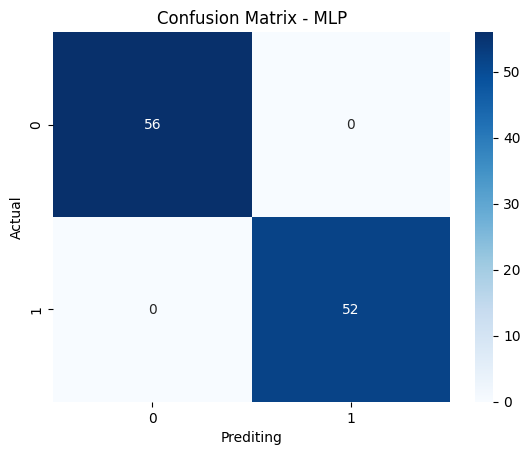

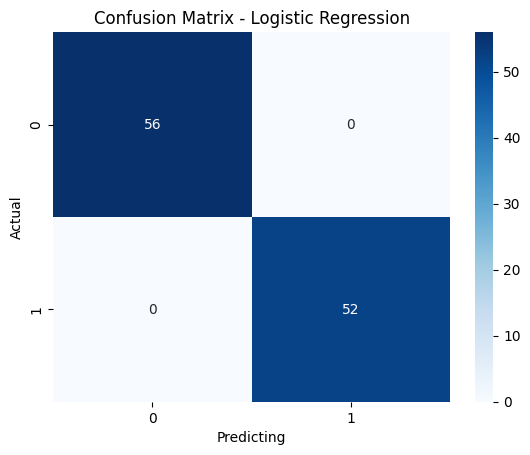

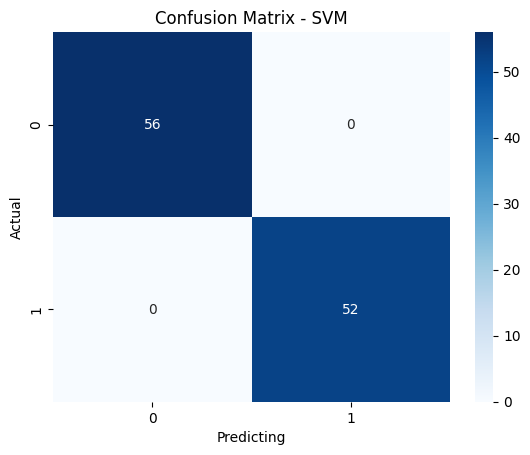

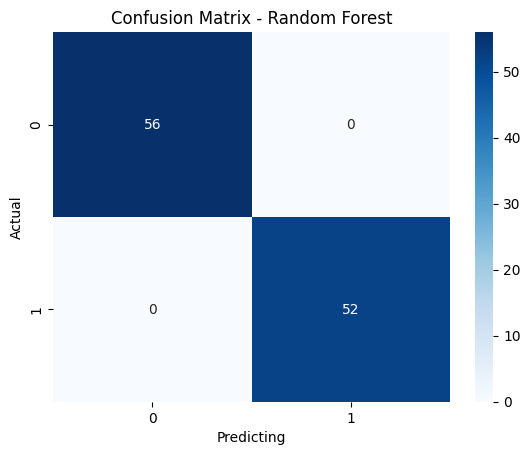

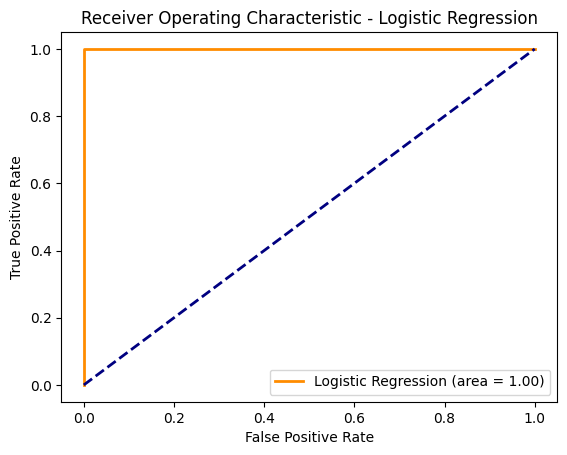

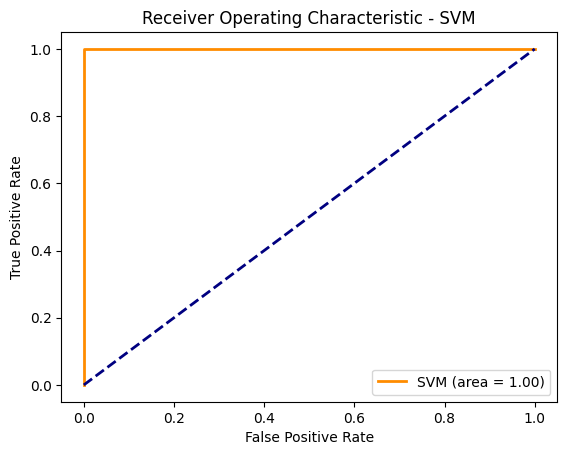

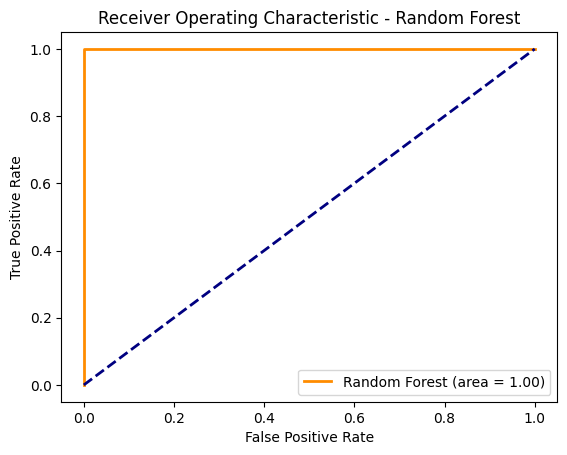

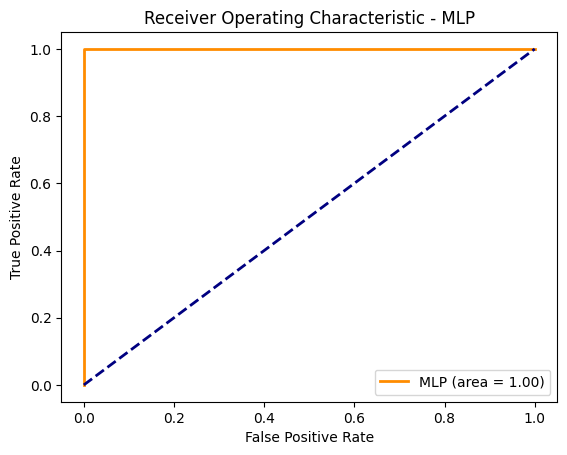


📊 Model Performance Summery:

                 Model  Accuracy  AUC
0  Logistic Regression       1.0  1.0
1                  MLP       1.0  1.0
2       Randome Forest       1.0  1.0
3                  SVM       1.0  1.0


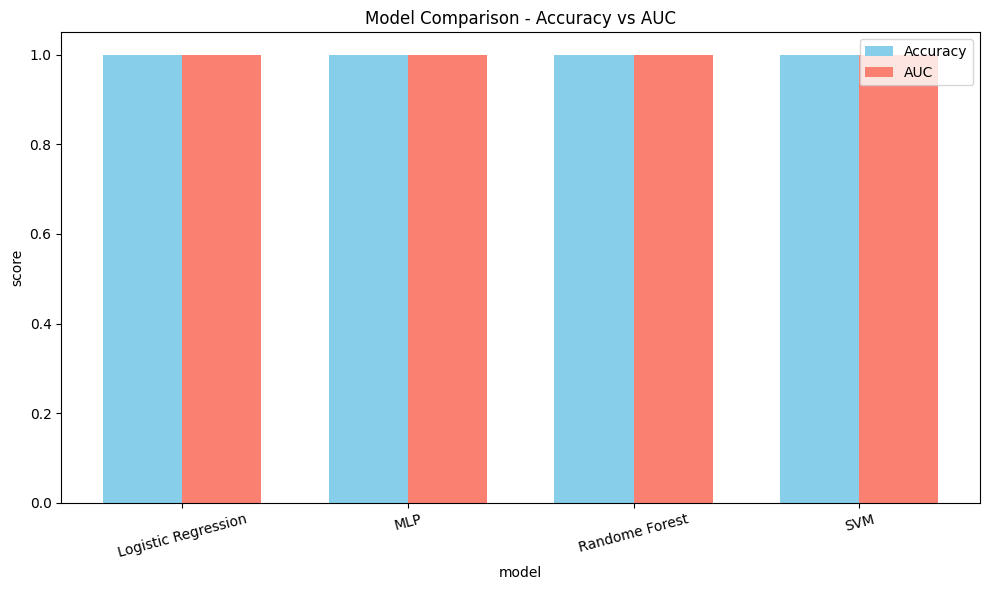

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier # Highlight: Added Random Forest model
from sklearn.model_selection import train_test_split, cross_val_score # Highlight: Added cross_val_score forbetter model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc #Highlight: Added roc_curve for further evaluation
from sklearn.neural_network import MLPClassifier # Highlight: import MLP model

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

#loading the dataset
digits = load_digits()
X = digits.data
y = digits.target

#Filtering only digits 0 and 1
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask] 

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

os.makedirs("result", exist_ok=True)

# Creating and training the Logistic Regression model
logreg_model = LogisticRegression(max_iter=100)
logreg_model.fit(X_train, y_train)

# Predicting with Logistic Regression model
y_pred_logreg = logreg_model.predict(X_test)

# Evaluating Logistic Regression model using cross-validation
logreg_cv_score = cross_val_score(logreg_model, X, y, cv=5)# Highlight: Evaluating model using cross-validation
print("Logistic Regression Cross-Validation Scores: ", logreg_cv_score)
print("Average Cross-Validation Score: ", np.mean(logreg_cv_score))

# Creating and training the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predicting with SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluating SVM model using cross-Validation
svm_cv_score = cross_val_score(svm_model, X, y, cv=5) # Highlight: Evaluating model using cross-validation
print("SVM Cross-Validation Scores: ", svm_cv_score)
print("Average Cross-Validation Score: ", svm_cv_score.mean())

# Creating and training the random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Highlight: Random Forest model initialized
rf_model.fit(X_train, y_train)

# Predicting with Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluating Random Forest model using cross-validation
rf_cv_score = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest Cross-Validation Scores: ", rf_cv_score)
print("Average Cross-Validation Scores: ", np.mean(rf_cv_score))

# Creating and traning the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predicting with MLP model
y_pred_mlp = mlp_model.predict(X_test)

# Evaluating MLP model using cross-validation
mlp_cv_score = cross_val_score(mlp_model, X, y, cv=5)
print("MLP Cross-Validation Scores: ", mlp_cv_score)
print("Average Cross-Validation Score : ", np.mean(mlp_cv_score))

# Accurecy & Classification Report
print("MLP Cross-Validation Scores: ", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

# Evaluating model's accuracy
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf)) # Highlight: Random Forest accuracy
print(classification_report(y_test, y_pred_rf)) # Highlight: Random Forest report

# Confusion Matrix for MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Prediting")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP")
plt.savefig("result/mlp_confusion_matrix.png")
plt.show()

# Plotting confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicting")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("result/logistic_confusion_matrix.png") # Highlight: Corrected file path
plt.show()

# Plotting confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicting")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.savefig("result/svm_confusion_matrix.png") # Highlight: Corrected file path
plt.show()

# Creat the directory if it doesn't exist
os.makedirs("G:/GITHUB Project/result", exist_ok=True)

# Plotting confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf) # Highlight: Random Forest confusion matrix
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicting")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.savefig("result/rf_confusion_matrix.png")  # Highlight: Saving confusion matrix RF
plt.show()

# Plotting ROC curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1]) # Highlight: Plotting ROC curve
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot([0 ,1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.savefig('result/Logistic_roc_curve.png')  # Highlight: Saving ROC curve for Logistic Regression
plt.show()

# Plotting ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.decision_function(X_test)) # Highlight: Plotting ROC curve
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0 ,1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc='lower right')
plt.savefig('result/svm_roc_curve.png')  # Highlight: Saving ROC curve for SVM
plt.show()

# Plotting ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1]) # Highlight: ROC curve RF
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0 ,1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.savefig('result/rf_roc_curve.png') 
plt.show()

# ROC Cruve for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[: , 1])
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label='MLP (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - MLP')
plt.legend(loc='lower right')
plt.savefig("result/mlp_roc_curve.png")
plt.show()

# Collecting Accuracy and AUC scores for each model
model_names = ["Logistic Regression", "SVM", "Random Forest", "MLP"]
accuracies = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_mlp),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm)
]

aucs = [
    roc_auc_logreg,
    roc_auc_mlp,
    roc_auc_rf,
    roc_auc_svm
]

# Creating a DataFrame to display summary
import pandas as pd
summary_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "AUC": aucs

})

print("\n📊 Model Performance Summary:\n")
print(summary_df)

# Plotting bar  chart for Accuracy and AUC
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(model_names))

bar1 = plt.bar(index, accuracies, bar_width, label='Accuracy', color='skyblue')
bar2 = plt.bar(index + bar_width, aucs, bar_width, label='AUC', color='salmon')

plt.xlabel('model')
plt.ylabel('score')
plt.title('Model Comparison - Accuracy vs AUC')
plt.xticks(index + bar_width / 2, model_names, rotation=15)
plt.legend()
plt.tight_layout()

plt.savefig("result/model_comparison.png") # Highlight: saving comparsion plot
plt.show()